Categorical Column Encoding

In [0]:
# Step 3.1: Encoding a categorical column
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load dataset
df = pd.read_csv("/Volumes/workspace/default/jaya/netflix_cleaned.csv")

# Initialize LabelEncoder
le = LabelEncoder()

# Encode the 'type' column
df['type_encoded'] = le.fit_transform(df['type'])

# Display first few results
print(df[['type', 'type_encoded']].head(10))


      type  type_encoded
0    Movie             0
1  TV Show             1
2  TV Show             1
3  TV Show             1
4  TV Show             1
5  TV Show             1
6    Movie             0
7    Movie             0
8  TV Show             1
9    Movie             0


Feature Creation

In [0]:
# Step 3.2: Creating a derived feature from duration
def categorize_duration(x):
    if 'min' in str(x):
        mins = int(x.split()[0])
        if mins < 60:
            return 'Short'
        elif mins < 120:
            return 'Medium'
        else:
            return 'Long'
    elif 'Season' in str(x):
        return 'Series'
    else:
        return 'Unknown'

df['Content_Length_Category'] = df['duration'].apply(categorize_duration)

print(df[['duration', 'Content_Length_Category']].head(10))


    duration Content_Length_Category
0     90 min                  Medium
1  2 Seasons                  Series
2  1 Seasons                  Series
3  1 Seasons                  Series
4  2 Seasons                  Series
5  1 Seasons                  Series
6     91 min                  Medium
7    125 min                    Long
8  9 Seasons                  Series
9    104 min                  Medium


Numerical Column Normalization

In [0]:
# Step 3.3: Scaling a numerical column
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df['release_year_scaled'] = scaler.fit_transform(df[['release_year']])

print(df[['release_year', 'release_year_scaled']].head())


   release_year  release_year_scaled
0          2020             0.989583
1          2021             1.000000
2          2021             1.000000
3          2021             1.000000
4          2021             1.000000


Content Length Category

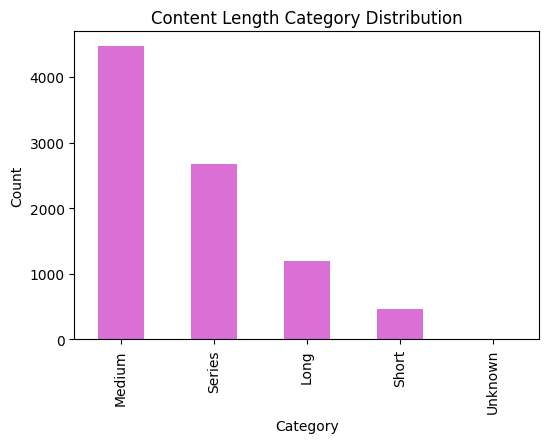

In [0]:
def categorize_duration(x):
    if 'min' in str(x):
        mins = int(x.split()[0])
        if mins < 60:
            return 'Short'
        elif mins < 120:
            return 'Medium'
        else:
            return 'Long'
    elif 'Season' in str(x):
        return 'Series'
    else:
        return 'Unknown'

df['Content_Length_Category'] = df['duration'].apply(categorize_duration)
%matplotlib inline
import matplotlib.pyplot as plt
# Visualization: Duration categories
plt.figure(figsize=(6,4))
df['Content_Length_Category'].value_counts().plot(kind='bar', color='orchid')
plt.title('Content Length Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


One-Hot Encode Multi-Class Categorical Column

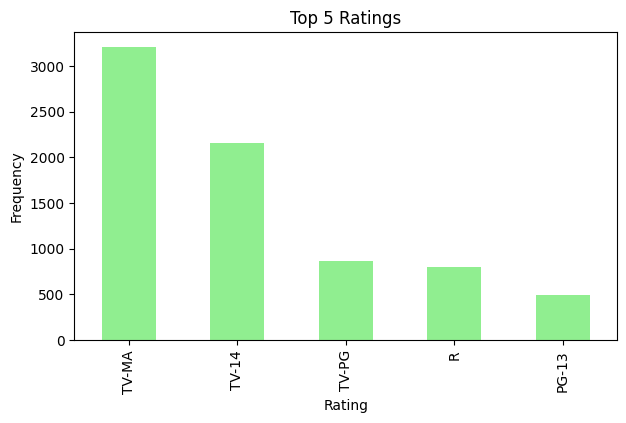

In [0]:
# One-hot encoding
rating_encoded = pd.get_dummies(df['rating'], prefix='rating')

# Merge into main dataframe
df = pd.concat([df, rating_encoded], axis=1)

# Visualization: Top 5 most common ratings
plt.figure(figsize=(7,4))
df['rating'].value_counts().head(5).plot(kind='bar', color='lightgreen')
plt.title('Top 5 Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


Create Feature – Original vs Licensed Content

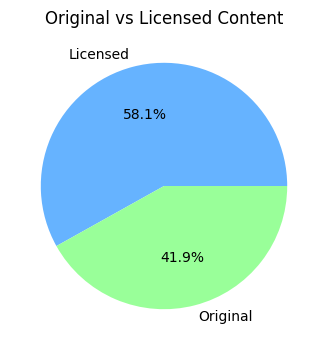

In [0]:
def check_original(x):
    if 'United States' in str(x):
        return 'Original'
    else:
        return 'Licensed'

df['is_original'] = df['country'].apply(check_original)

# Visualization: Original vs Licensed
plt.figure(figsize=(6,4))
df['is_original'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
plt.title('Original vs Licensed Content')
plt.ylabel('')
plt.show()


Normalize Numerical Feature

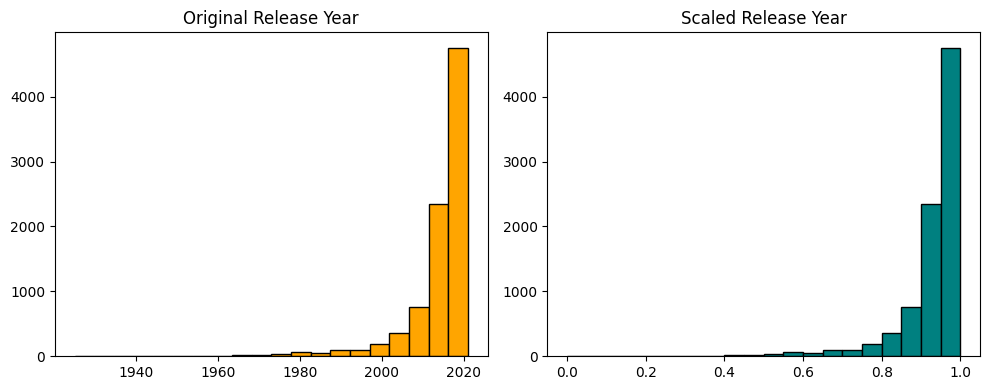

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['release_year_scaled'] = scaler.fit_transform(df[['release_year']])

# Visualization: Before vs After Scaling
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['release_year'], bins=20, color='orange', edgecolor='black')
plt.title('Original Release Year')

plt.subplot(1,2,2)
plt.hist(df['release_year_scaled'], bins=20, color='teal', edgecolor='black')
plt.title('Scaled Release Year')
plt.tight_layout()
plt.show()


Text Feature Engineering

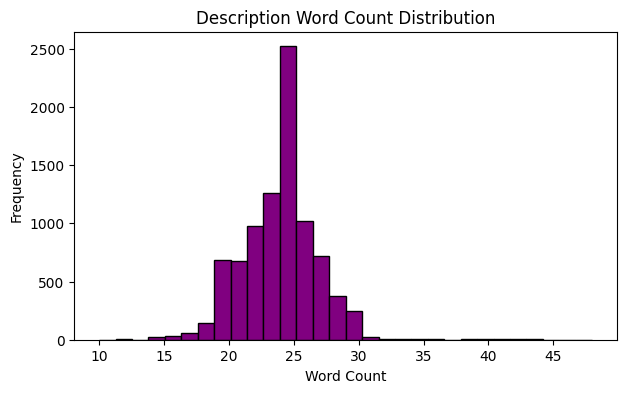

In [0]:
df['description_word_count'] = df['description'].apply(lambda x: len(str(x).split()))

# Visualization
plt.figure(figsize=(7,4))
plt.hist(df['description_word_count'], bins=30, color='purple', edgecolor='black')
plt.title('Description Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


Convert date_added to Datetime Format

In [0]:
import pandas as pd
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Check result
display(df[['title', 'date_added']].head())


title,date_added
Dick Johnson Is Dead,2021-09-25T00:00:00.000Z
Blood & Water,2021-09-24T00:00:00.000Z
Ganglands,2021-09-24T00:00:00.000Z
Jailbirds New Orleans,2021-09-24T00:00:00.000Z
Kota Factory,2021-09-24T00:00:00.000Z


Extract Date-Based Features

In [0]:
# Extract year, month, day, weekday
df['added_year'] = df['date_added'].dt.year
df['added_month'] = df['date_added'].dt.month
df['added_day'] = df['date_added'].dt.day
df['added_weekday'] = df['date_added'].dt.day_name()

display(df[['title', 'date_added', 'added_year', 'added_month', 'added_weekday']].head())


title,date_added,added_year,added_month,added_weekday
Dick Johnson Is Dead,2021-09-25T00:00:00.000Z,2021,9,Saturday
Blood & Water,2021-09-24T00:00:00.000Z,2021,9,Friday
Ganglands,2021-09-24T00:00:00.000Z,2021,9,Friday
Jailbirds New Orleans,2021-09-24T00:00:00.000Z,2021,9,Friday
Kota Factory,2021-09-24T00:00:00.000Z,2021,9,Friday


Visualization — Monthly Additions Over Time

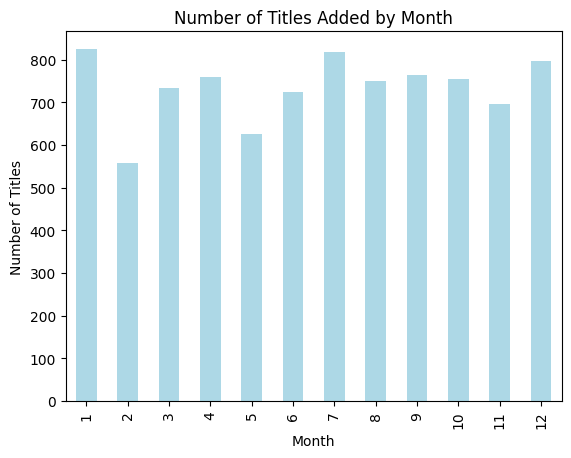

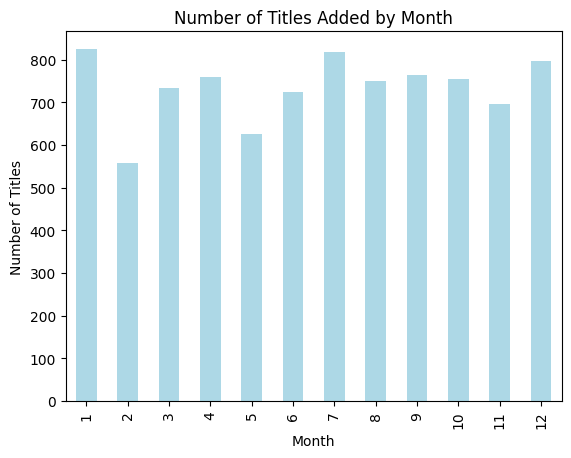

In [0]:
import matplotlib.pyplot as plt
 # ensures inline plotting in Databricks

# Group by month and count
monthly_adds = df.groupby('added_month')['show_id'].count().sort_index()

monthly_adds.plot(kind='bar', color='lightblue')
plt.title('Number of Titles Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
display(plt.gcf())


Handle Missing Directors

In [0]:
import pandas as pd



# Replace missing director values
df.fillna({'director': 'Unknown'}, inplace=True)

display(df[['title', 'director']].head(10))


title,director
Dick Johnson Is Dead,Kirsten Johnson
Blood & Water,Unknown
Ganglands,Julien Leclercq
Jailbirds New Orleans,Unknown
Kota Factory,Unknown
Midnight Mass,Mike Flanagan
My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha"
Sankofa,Haile Gerima
The Great British Baking Show,Andy Devonshire
The Starling,Theodore Melfi


Count of Shows per Director

In [0]:
# Count number of titles per director
director_counts = df['director'].value_counts().reset_index()
director_counts.columns = ['director', 'total_titles']

# Merge this info back to main DataFrame
df = df.merge(director_counts, on='director', how='left')

display(df[['title', 'director', 'total_titles']].head(10))


title,director,total_titles
Dick Johnson Is Dead,Kirsten Johnson,1
Blood & Water,Unknown,2634
Ganglands,Julien Leclercq,3
Jailbirds New Orleans,Unknown,2634
Kota Factory,Unknown,2634
Midnight Mass,Mike Flanagan,4
My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",1
Sankofa,Haile Gerima,1
The Great British Baking Show,Andy Devonshire,1
The Starling,Theodore Melfi,1


Flag for “Famous Director” dirctor with more than 2 titles

In [0]:
df['is_famous_director'] = df['total_titles'].apply(lambda x: 1 if x >=3 else 0)

display(df[['director', 'total_titles', 'is_famous_director']].drop_duplicates().head(10))


director,total_titles,is_famous_director
Kirsten Johnson,1,0
Unknown,2634,1
Julien Leclercq,3,1
Mike Flanagan,4,1
"Robert Cullen, José Luis Ucha",1,0
Haile Gerima,1,0
Andy Devonshire,1,0
Theodore Melfi,1,0
Kongkiat Komesiri,1,0
Christian Schwochow,1,0


Top 10 Most Frequent Directors

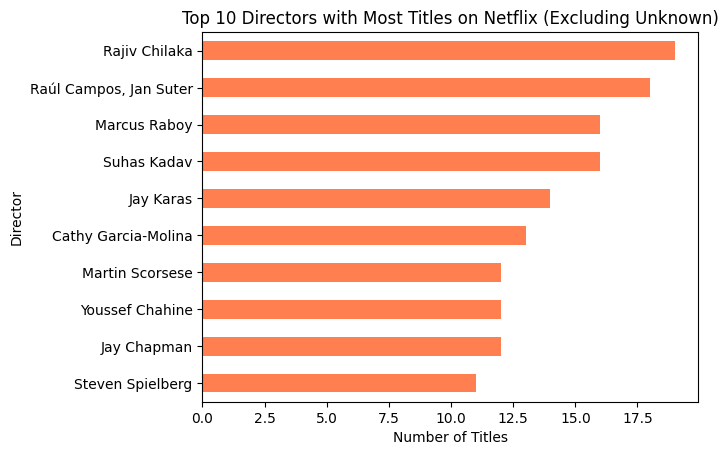

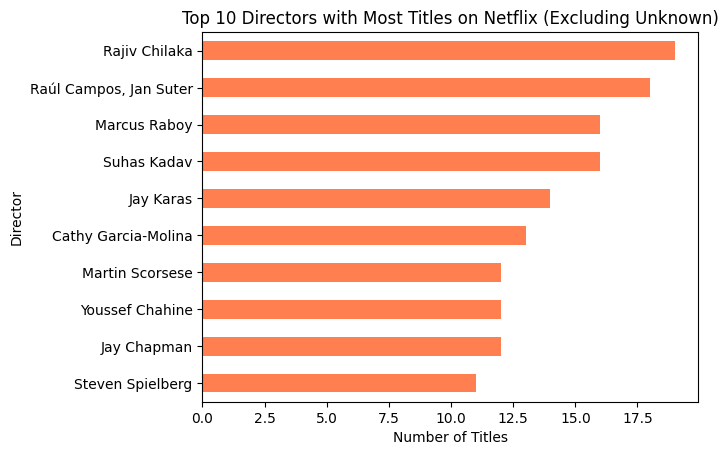

In [0]:
import matplotlib.pyplot as plt


# Exclude 'Unknown' from analysis
filtered_directors = df[df['director'] != 'Unknown']

# Get top 10 directors by count
top_directors = filtered_directors['director'].value_counts().head(10)

# Plot
top_directors.plot(kind='barh', color='coral')
plt.title('Top 10 Directors with Most Titles on Netflix (Excluding Unknown)')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.gca().invert_yaxis()

# Display figure
display(plt.gcf())


Create “Number of Cast Members” Feature

In [0]:
# Count number of actors per title
df['num_cast_members'] = df['cast'].apply(lambda x: len(str(x).split(',')) if x != 'Unknown' else 0)

display(df[['title', 'cast', 'num_cast_members']].head())


title,cast,num_cast_members
Dick Johnson Is Dead,Unknown,0
Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",19
Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",9
Jailbirds New Orleans,Unknown,0
Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",8


Top Actor Frequency Feature

In [0]:
from collections import Counter

# Flatten all actors into a single list
all_actors = []
df['cast'].apply(lambda x: all_actors.extend([i.strip() for i in str(x).split(',') if i != 'Unknown']))

# Get top 10 most frequent actors
actor_counts = Counter(all_actors).most_common(10)

top_actors_df = pd.DataFrame(actor_counts, columns=['actor', 'num_titles'])
display(top_actors_df)



actor,num_titles
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Naseeruddin Shah,32
Takahiro Sakurai,32
Rupa Bhimani,31
Akshay Kumar,30
Om Puri,30
Yuki Kaji,29
Amitabh Bachchan,28


Visualization – Top 10 Most Frequent Actors

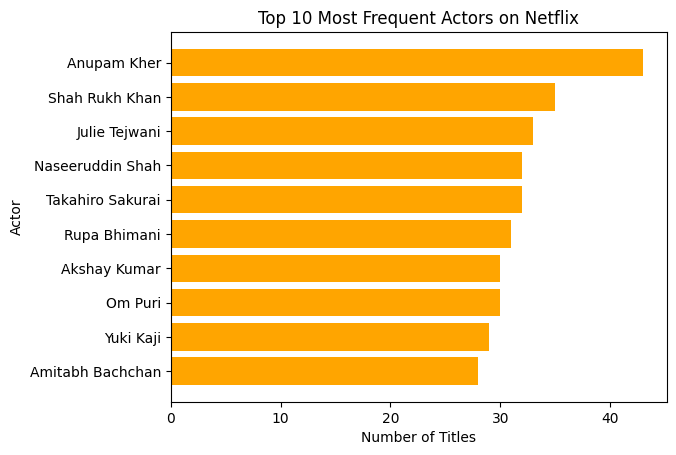

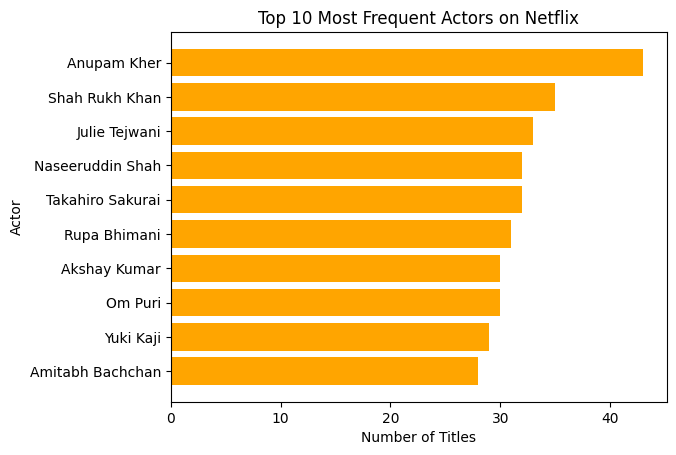

In [0]:
import matplotlib.pyplot as plt


plt.barh(top_actors_df['actor'], top_actors_df['num_titles'], color='orange')
plt.title('Top 10 Most Frequent Actors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.gca().invert_yaxis()
display(plt.gcf())
